In [1]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from numpy import asarray
from matplotlib import pyplot as plt

In [18]:
a = np.arange(-1,1,0.005)
b = asarray([1.0+2.0*i+(4.0*(i**3.0)) for i in a])
print(a.min(), a.max(), b.min(), b.max())

-1.0 0.9950000000000019 -5.0 6.930299500000026


In [19]:
a = a.reshape((len(a), 1))
b = b.reshape((len(b), 1))

In [20]:
scale_a = MinMaxScaler()
a = scale_a.fit_transform(a)
scale_b = MinMaxScaler() 
b = scale_b.fit_transform(b)
print(a.min(), a.max(), b.min(), b.max())

0.0 1.0 0.0 1.0


In [21]:
model = Sequential()
model.add(Dense(10, input_dim=1, activation='tanh', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='sigmoid', kernel_initializer='he_uniform'))
model.add(Dense(1))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                20        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='mse', optimizer='Adam')

In [25]:
model.fit(a, b, epochs=450, batch_size=10, verbose=1)

Epoch 1/450
40/40 [==============================] - 0s 2ms/step - loss: 2.0628
Epoch 2/450
40/40 [==============================] - 0s 2ms/step - loss: 1.0220
Epoch 3/450
40/40 [==============================] - 0s 2ms/step - loss: 0.4510
Epoch 4/450
40/40 [==============================] - 0s 2ms/step - loss: 0.1811
Epoch 5/450
40/40 [==============================] - 0s 2ms/step - loss: 0.0703
Epoch 6/450
40/40 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 7/450
40/40 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 8/450
40/40 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 9/450
40/40 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 10/450
40/40 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 11/450
40/40 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 12/450
40/40 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 13/450
40/40 [=================

In [26]:
b_pred = model.predict(a)

13/13 [==============================] - 0s 2ms/step


In [27]:
a_plot = scale_a.inverse_transform(a)
b_pred_plot = scale_b.inverse_transform(b_pred)

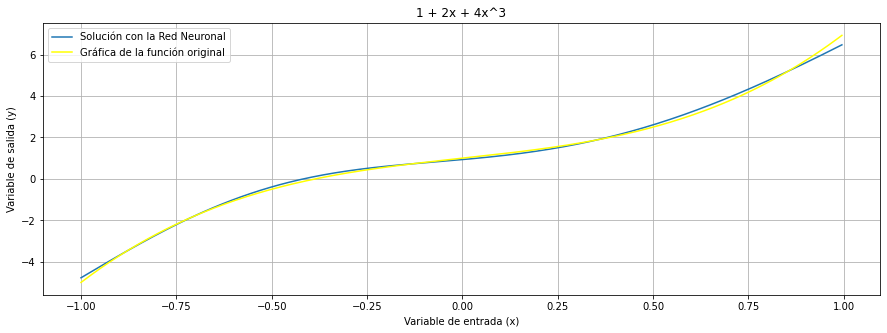

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(a_plot,b_pred_plot, label='Solución con la Red Neuronal')

plt.plot(a_plot,1.0+2.0*a_plot+(4.0*(a_plot**3.0)), label='Gráfica de la función original', color='yellow')

plt.title('1 + 2x + 4x^3')
plt.xlabel('Variable de entrada (x)')
plt.ylabel('Variable de salida (y)')
plt.legend()
plt.grid(which='both')
plt.show()

In [29]:
b = 1.0+2.0*a_plot+(4.0*(a_plot**3.0))
print('MSE: %.3f' % mean_squared_error(b, b_pred_plot))

MSE: 0.012
